# Titanic: Machine Learning from Disaster

## Data Overview (from Kaggle)

### Competition Description  
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

### Data Dictionary  
|Variable|Definition|Key|Type of Variable|Data Type|Variable Category|
|--------|----------|---|----------------|---------|-----------------|
|survival|Survival|0 = No, 1 = Yes|Target variable|Numeric|Categorical|
|pclass|Ticket class||Predictor variable|Numeric|Categorical|
|name|Passenger name||Predictor variable|Character|Categorical|
|sex|Sex||Predictor variable|Character|Categorical|
|Age|Age in years||Predictor varible|Numeric|Continuous|
|sibsp|# of siblings / spouses aboard the Titanic||Predictor variable|Numeric|Continuous|
|parch|# of parents / children aboard the Titanic||Predictor variable|Numeric|Continuous|
|ticket|Ticket number||Predictor variable|Character|Categorical|
|fare|Passenger fare||Predictor variable|Numeric|Continuous|
|cabin|Cabin number||Predictor variable|Character|Categorical|
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|Predictor variable|Character|Categorical|

### Variable Notes  
__pclass__: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower  
  
__age__: Age is fractional if less than 1.  If the age is estimated, it is in the form of xx.5  

__sibsp__: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

__parch__: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.

## Exploratory Data Analysis

### Univariate Analysis

In [1]:
import pandas as pd

First, we need to read in the test and train data sets.  Both data sets were provided by Kaggle.  The training set includes Survived values and the test set does not.  Predictions for test set values must be submitted to Kaggle in order to determine accuracy.

In [3]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

Now that the data has been imported, we can use the Pandas info() method to see some basic information about the training set.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The training  data contains 891 records.  The Age, Cabin, and Embarked variables all appear to be missing some values and will most likely require some sort of imputation.  We may also want to modify the data types for some of these variables.  For example, the Sex variable is currently a default Pandas object, but may prove more useful if converted to a boolean value.

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The Name, Sex, Ticket, Cabin, and Embarked columns are currently text values.  We will most likely want to replace at least some of these with dummy variables in order to include them in the models.  

The ticket variable seems to have different formats for different values.  Further investigation will need to be done in order to determine if this variable can provide any value.  

The Cabin variable is farely sparse, but the missing values may not be random.  It is likely that cabins were only assigned to higher passenger classes.  In this very small sample of data, the two records with Cabin values are for first class passengers and the three records with null Cabin values are third class passengers.  This will require further investigation.

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Continuous Variables

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

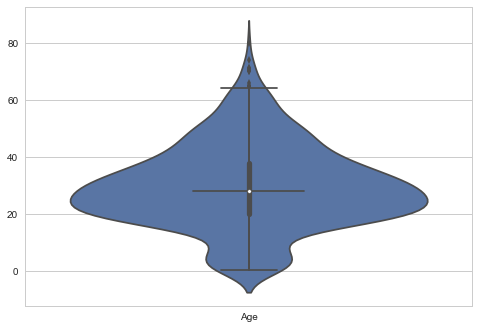

In [49]:
sns.set_style('whitegrid')

sns.violinplot(data=train['Age'])
sns.boxplot(data=train['Age'], showbox=False, width=0.25).set_xticklabels(['Age'])

The Age variable has a min of 0.42 years and a max of 80.  Both of these values seem reasonable.  The distribution of ages is slightly bimodal.  There appear to have been more children on the ship than elderly people.  The mean age is slightly below 30.

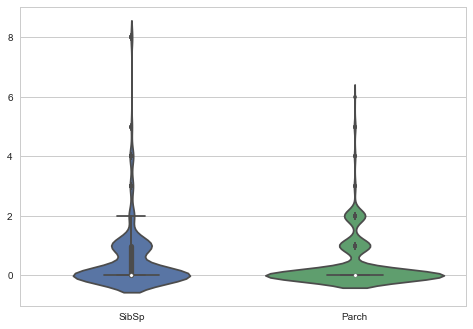

In [45]:
sns.violinplot(data=train[['SibSp','Parch']])
sns.boxplot(data=train[['SibSp','Parch']], showbox=False, width=0.25)

The SibSp and Parch variables are both extremely right-tailed.  We will most likely want to use a transform on these variables if they are going to be included in models that assume a normal distribution.  The bulk of the records have values of 0 for SibSp and Parch.  The maximum value for SibSp is 8 and the max for Parch is 6.

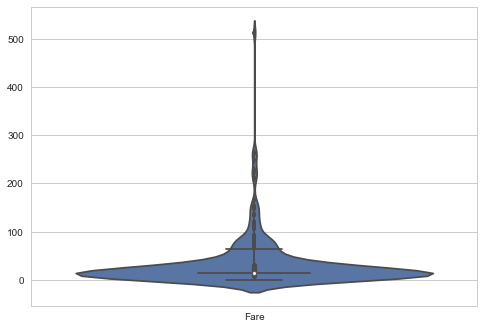

In [53]:
sns.violinplot(data=train['Fare'])
sns.boxplot(data=train['Fare'], showbox=False, width=0.25).set_xticklabels(['Fare'])

The Fare variable is also somewhat skewed.  If you look closely though, it appears that the distribution is fairly normal, but being skewed by a few severe outliers.  We will need to investigate these outliers and try to determine if they are valid.

Next, we'll plot a correlation matrix of the training data to see if any of the features are correlated with each other.

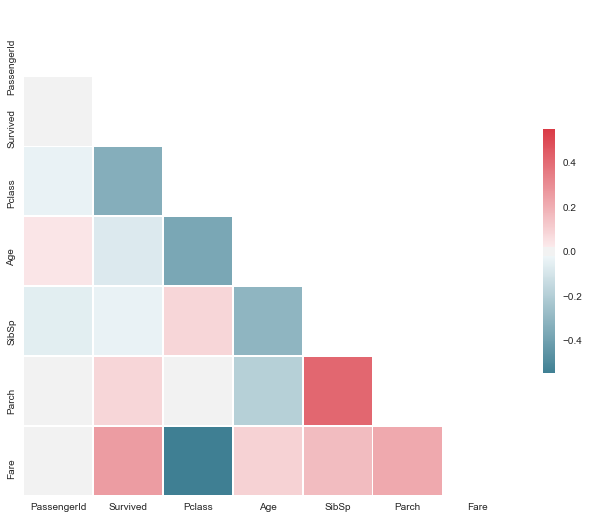

In [15]:
# Set the style for the plot
sns.set(style='white')

# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
           square=True, linewidth=0.5, cbar_kws={'shrink': 0.5})

In [16]:
print(corr)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  
